<a href="https://colab.research.google.com/github/GabrielleRab/SRMPmachine/blob/main/Decision_Trees_Mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

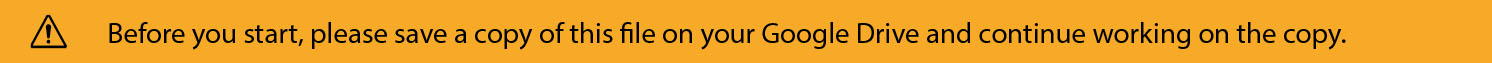

---

# **Decision Trees Colab: Poisonous Mushrooms**

In this activity, you will build a decision tree to predict whether or not a mushroom is poisonous based on specific features or characteristics. You will determine which features are best able to predict the edibility of mushrooms.

Decision trees are the building blocks of some of the most powerful supervised learning methods that are used today. The goal of a decision tree is to split your data into groups such that every element in one group belongs to one category. This makes it ideal for a binary classification task like poisonous vs not-poisonous.

### **Step 1:** Understand the data

This data set includes descriptions of 8,124 hypothetical samples from 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each sample is labeled as poisonous or not poisonous and all features of the mushroom are described.

Take a moment to read the list of mushroom **features** and their descriptions in the linked Google Doc [here](https://docs.google.com/document/d/1Cbm-EvOJLiE725qYLw1jcl1-zz_5sPosJ5_q1lsEPFw/edit?usp=sharing).

Which features do you think will be the most **predictive** of whether or not a mushroom is poisonous?

### **Step 2:** Import the necessary Python libraries

We will use the sklearn Python library to create our Decision Tree. Run the code below to import the necessary sklearn modules along with libraries for data analysis and visualization.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import graphviz

### **Step 3:** Load in the data

Run the code below to import the data, store it as a dataframe and preview the first 5 rows.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/GabrielleRab/SRMPmachine/main/datasets/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


### **Step 4:** Split the data into a training and testing set

Machine learning models first need to learn from labeled data (the training step) before they can be used to make predictions about new data (the testing step).

Since we only have one dataset, we will need to split it into a training and a testing set. Run the code below to split our data 50/50 into the two sets:

In [ ]:
#Get the features and labels from the data
#(and convert categorical information into indicator values)
x = df.drop(['class'], axis=1)
y = df['class']
x = pd.get_dummies(x)
y = pd.get_dummies(y)

#Specify a 50% split
training_percentage = 50

#Create the training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=training_percentage/100, random_state=0)

### **Step 5:** Create the model

Now it's time to make our decision tree. We will also need to set the hyperparameters (values that control how the model learns and makes decisions). In this case we will specify the maximum depth and the criterion the model will use to evaluate each feature.

Run the code below to create your model:

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

### **Step 5:** Train the model

Now that we have created a decision tree it's time to train it using our training dataset. We will also evaluate the model's accuracy (what percent of mushrooms did it correctly identify as poisonous or non-poisonous).

Run the code below to train and evaluate our model:

In [ ]:
#Train the model
clf.fit(X_train, Y_train)

#Print the training accuracy
print('\nTraining Accuracy (%): ',(100*(clf.score(X_train,Y_train))))


Training Accuracy (%):  95.24864598719842


### **Step 6:** Visualizing the tree

Now that we have trained our model, we can see which features it is using to make predictions. Run the code below to visualize the tree:

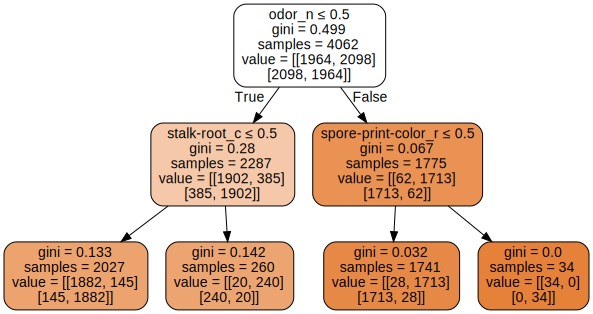

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=X_train.columns,
                               class_names=Y_train.values,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

#Note: the values are shown in the order [[P, E], [E, P]]

### **Step 7:** Testing the tree

Run this code block to run the other half of our data (the testing dataset) through the model we just trained to find out how accurate it is with new data:

In [ ]:
#Make the prediction using the model
Y_pred = clf.predict(X_test)

print('Percentage accuracy: ', 100*accuracy_score(Y_test, Y_pred))

Percentage accuracy:  95.59330379123584
